In [27]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from os import system

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

import seaborn as sns

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [30]:
original_df = pd.read_csv("LeagueDatasetTest.csv")
df = pd.read_csv("LeagueDatasetTest.csv")
del df['gc_ratio_diff']
# test_df = df(np.random.randn(100,2))
train_df, test_df = train_test_split(df, test_size = 0.2)
test_y = test_df['runtime'].values

In [31]:
train_df.describe(include='all')

,c_avg_deg_cons,c_avg_dom_cons,c_avg_domdeg_cons,c_bounds_d,c_bounds_r,c_bounds_z,c_cv_deg_cons,c_cv_dom_cons,c_cv_domdeg_cons,c_domain,...,v_ratio_bounded,v_ratio_vars,v_sum_deg_vars,v_sum_dom_vars,v_sum_domdeg_vars,number_of_teams,fixtures_left,number_of_constraints,runtime,fpoints
count,1320.000000,1320.000000,1320.000000,1320.0,1320.0,1320.0,1320.000000,1320.000000,1320.000000,1320.0,...,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,2.723131,4.823527,1.706442,0.0,0.0,0.0,0.609096,0.710604,0.458168,0.0,...,0.347549,0.977657,1338.403788,1328.611364,572.877220,9.335606,4.067424,3.003788,3.261212,17.120455
std,0.070639,0.492270,0.127661,0.0,0.0,0.0,0.083468,0.068679,0.067152,0.0,...,0.114179,0.006509,494.570947,509.424810,212.337745,1.729275,2.221782,1.424092,5.888917,7.804950
min,2.432620,3.669870,1.427480,0.0,0.0,0.0,0.412949,0.503628,0.278322,0.0,...,0.135922,0.951724,337.000000,339.000000,153.417000,6.000000,1.000000,1.000000,0.020000,-1.000000
25%,2.690520,4.485710,1.603960,0.0,0.0,0.0,0.524467,0.681024,0.404380,0.0,...,0.251276,0.974336,856.000000,877.500000,366.600250,7.000000,2.000000,2.000000,0.040000,12.000000
50%,2.753420,4.912735,1.717910,0.0,0.0,0.0,0.640502,0.721049,0.451536,0.0,...,0.335290,0.979930,1488.000000,1434.000000,627.097000,10.000000,4.000000,3.000000,0.050000,18.000000
75%,2.771800,5.279630,1.829032,0.0,0.0,0.0,0.667489,0.760904,0.520255,0.0,...,0.413566,0.982512,1734.000000,1753.250000,745.446000,10.000000,6.000000,4.000000,2.000000,23.000000
max,2.825540,5.468870,1.889450,0.0,0.0,0.0,0.720174,0.817758,0.562234,0.0,...,0.611881,0.987749,2134.000000,2233.000000,928.874000,11.000000,8.000000,5.000000,15.020000,39.000000


In [32]:
def getAverages(lst, average_feature, average_result):
    copy_lst = lst.reset_index(drop=True)
#     print(lst.reset_index())
#     print(copy_lst[average_feature])
    averages = []
#     print(copy_lst[21])
    for value in range(1, copy_lst[average_feature].max()+1):
        value_indices = np.where(copy_lst[average_feature]==value)
        total=0
        for value_index in value_indices[0]:
            total += copy_lst[average_result][value_index]
        if len(value_indices[0]) != 0:
            averages.append([value, total/len(value_indices[0])])
    return averages

fixtures_left = train_df['fixtures_left']
# print(getAverages(fixtures_left))
result = getAverages(train_df, 'number_of_teams', 'runtime')
# result.keys()
print(result)


[[6, 0.03230263157894734], [7, 0.06670050761421302], [10, 4.361787365177201], [11, 4.521583850931665]]


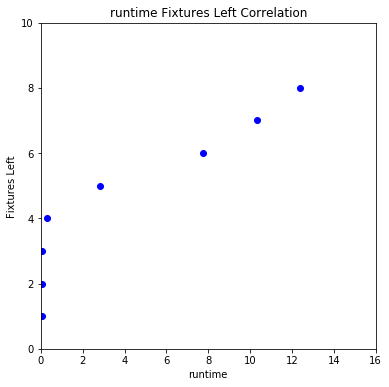

In [33]:
results = getAverages(train_df, 'fixtures_left', 'runtime')
runtime = []
fixtures_left = []
for item in results:
    runtime.append(item[1])
    fixtures_left.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('runtime Fixtures Left Correlation')
plt.scatter(runtime, fixtures_left, color='blue', marker='o')
plt.xlabel('runtime')
plt.ylabel('Fixtures Left')
plt.xlim(0,16.0)
plt.ylim(0,10)
plt.show()

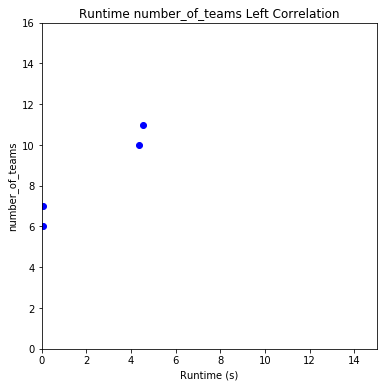

In [34]:
results = getAverages(train_df, 'number_of_teams', 'runtime')
runtime = []
number_of_teams = []
for item in results:
    runtime.append(item[1])
    number_of_teams.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('Runtime number_of_teams Left Correlation')
plt.scatter(runtime, number_of_teams, color='blue', marker='o')
plt.xlabel('Runtime (s)')
plt.ylabel('number_of_teams')
plt.xlim(0,15.0)
plt.ylim(0,16)
plt.show()

In [35]:
train_y = train_df['fpoints'].values
league_numeric_features = ['c_avg_deg_cons',
 'c_avg_dom_cons',
 'c_avg_domdeg_cons',
 'c_cv_deg_cons',
 'c_cv_dom_cons',
 'c_cv_domdeg_cons',
 'c_ent_deg_cons',
 'c_ent_dom_cons',
 'c_ent_domdeg_cons',
 'c_logprod_deg_cons',
 'c_logprod_dom_cons',
 'c_max_deg_cons',
 'c_max_dom_cons',
 'c_max_domdeg_cons',
 'c_num_cons',
 'c_ratio_cons',
 'c_sum_ari_cons',
 'c_sum_dom_cons',
 'c_sum_domdeg_cons',
 'd_bool_vars',
 'd_int_cons',
 'd_int_vars',
 'd_ratio_bool_vars',
 'd_ratio_int_cons',
 'd_ratio_int_vars',
 'o_deg',
 'o_deg_avg',
 'o_deg_cons',
 'o_deg_std',
 'o_dom',
 'o_dom_avg',
 'o_dom_std',
 'v_avg_deg_vars',
 'v_avg_dom_vars',
 'v_avg_domdeg_vars',
 'v_cv_deg_vars',
 'v_cv_dom_vars',
 'v_cv_domdeg_vars',
 'v_def_vars',
 'v_ent_deg_vars',
 'v_ent_dom_vars',
 'v_ent_domdeg_vars',
 'v_intro_vars',
 'v_logprod_deg_vars',
 'v_logprod_dom_vars',
 'v_max_deg_vars',
 'v_max_dom_vars',
 'v_max_domdeg_vars',
 'v_min_dom_vars',
 'v_min_domdeg_vars',
 'v_num_aliases',
 'v_num_consts',
 'v_num_vars',
 'v_ratio_bounded',
 'v_ratio_vars',
 'v_sum_deg_vars',
 'v_sum_dom_vars',
 'v_sum_domdeg_vars\n\n',
 'number_of_teams',
 'fixtures_left',
 'number_of_constraints']

null_league_numeric_values = [
    'v_min_deg_vars',
    'c_bounds_d',
    'c_bounds_r',
    'c_bounds_z',
    'd_ratio_set_cons',
    'd_ratio_set_vars',
    'd_set_cons',
    'd_set_vars',
    'gc_diff_globs',
    'gc_global_cons',
    'gc_ratio_diff',
    'gc_ratio_globs',
    's_bool_search',
    's_first_fail',
    's_goal',
    's_indomain_max',
    's_indomain_min',
    's_input_order',
    's_int_search',
    's_labeled_vars',
    's_other_val',
    's_other_var',
    's_set_search',
    'o_dom_deg',
    'd_ratio_float_cons',
    'd_ratio_float_vars',
    'c_min_deg_cons',
    'c_min_dom_cons',
    'c_min_domdeg_cons',
    'd_ratio_array_cons',
    'd_ratio_bool_cons',
    'd_float_cons',
    'd_float_vars',
    'd_array_cons',
    'd_bool_cons',
    'c_domain',
    'c_priority',
]

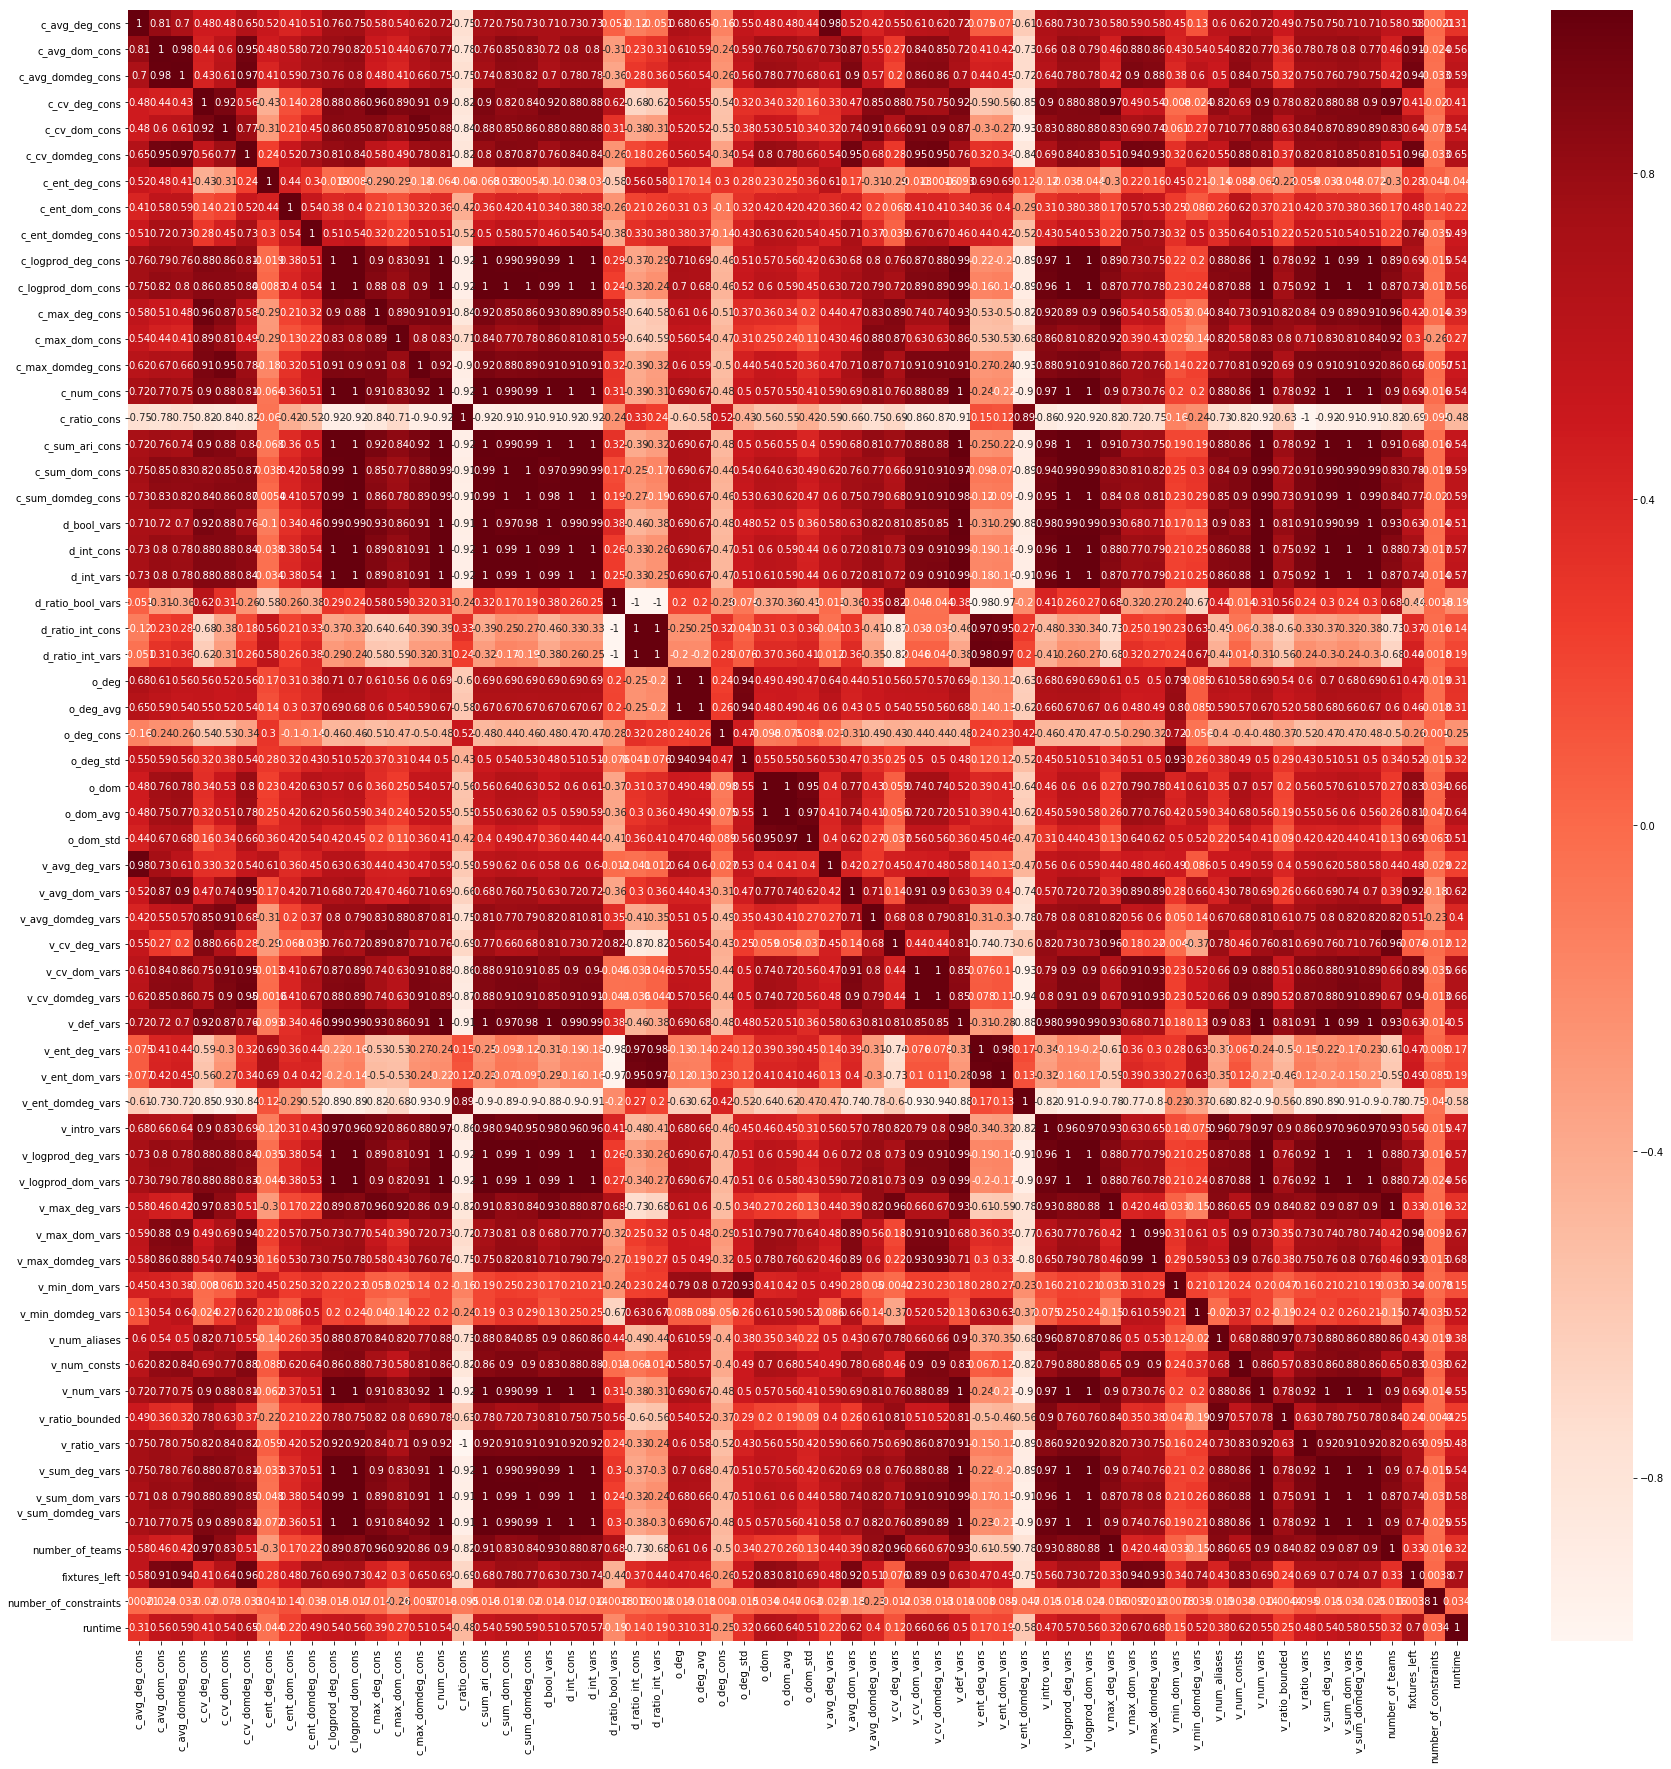

In [36]:
# split the features into sets of 5, check their correlation with output, and delete
# uncorrelated features
split_features = []
# league_numeric_features += ['result']
features_with_y = league_numeric_features
# train_df['result'] = train_y

for i in range(0, len(features_with_y), 10):
    split_features.append(features_with_y[i:i+10]+['runtime'])

# print(split_features)
# list(df.columns)
plt.figure(figsize=(30,30))
# cor = train_df[split_features[1]].corr()
cor = train_df[league_numeric_features+['runtime']].corr()
# print(train_df[split_features[1]].corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [37]:
random_forest = Pipeline([
    ('pre', ColumnTransformer([("num", FunctionTransformer(lambda x : x), league_numeric_features)], remainder="drop")),
    ("est", RandomForestRegressor(n_estimators=60, max_depth=3))
])

In [38]:
np.mean(cross_val_score(random_forest, test_df, test_y, scoring="neg_mean_squared_error", cv=10))

-14.42010952759642

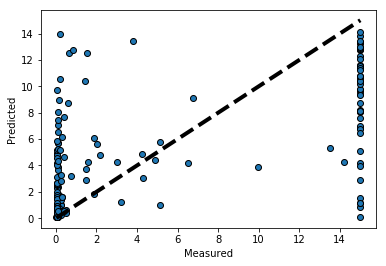

In [39]:
predicted = cross_val_predict(random_forest, test_df, test_y, cv=10)

fix, ax = plt.subplots()
ax.scatter(test_y, predicted, edgecolors=(0,0,0))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()